<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/taca/blob/main/ref/geron/chap_2/1_working_data/1_real_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Capítulo 2 Proyecto de aprendizaje automático de principio a fin 

## [Video de apoyo](https://www.youtube.com/watch?v=cVSDfgjdX4A) 

## Objetivo:  

Trabajar en un ejemplo de proyecto de principio a fin, pretendiendo ser un científico de datos contratado recientemente en una empresa inmobiliaria. 

Estos son los pasos principales por los que pasará:

1. Mire el panorama general.
2. Obtenga los datos.
3. Descubra y visualice los datos para obtener información.
4. Prepare los datos para los algoritmos de Machine Learning.
5. Seleccione un modelo y entrénelo.
6. Ajuste su modelo.
7. Presenta tu solución.


## Trabajando con datos reales

Cuando esté aprendiendo sobre Machine Learning, es mejor experimentar con datos del mundo real, no con conjuntos de datos artificiales.

## Mira la imagen completa

Su primera tarea es utilizar los datos del censo de California para construir un **modelo de precios de vivienda** en el estado.

Estos datos incluyen métricas como 

* la población (`population`), 
* el ingreso medio (`median_income`) y 
* el precio medio de la vivienda (`median_house_value`)  

para cada grupo de bloques en California.

* Los grupos de bloques son la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra.    
* (un grupo de bloques generalmente tiene una población de 600 a 3000 personas).

Los llamaremos "distritos" para abreviar.

Su modelo debe aprender de estos datos y poder predecir el precio medio de la vivienda en cualquier distrito, dadas todas las demás métricas.

## Sugerencias o tips

Lo primero que debe hacer es sacar **la lista de verificación de su proyecto de aprendizaje automático**.

Esta lista de verificación puede guiarlo a través de sus proyectos de aprendizaje automático.

Hay ocho pasos principales:

1. Encuadre el problema y observe el panorama general.
2. Obtenga los datos.
3. Explore los datos para obtener información.
4. Prepare los datos para exponer mejor los patrones de datos subyacentes a   
   los algoritmos de aprendizaje automático.
5. Explore muchos modelos diferentes y seleccione los mejores.
6. Ajuste sus modelos y combínelos en una gran solución.
7. Presente su solución.
8. Supervise y mantenga su sistema.

## Enmarca el problema

La primera pregunta que debe hacerle a su jefe es:  

* ¿cuál es exactamente el objetivo comercial?.

Probablemente, construir un modelo no sea el objetivo final.

¿Cómo espera la empresa utilizar y beneficiarse de este modelo?

Conocer el objetivo es importante porque:
* determinará cómo enmarca el problema,   
* qué algoritmos seleccionará,   
* qué medida de rendimiento utilizará para evaluar su modelo y 
* cuánto esfuerzo dedicará a ajustarlo.

Su jefe responde que el resultado de su modelo (una predicción del precio medio de la vivienda de un distrito) se enviará a otro sistema de aprendizaje automático, junto con muchas otras señales.

Este sistema aguas abajo determinará si vale la pena invertir en un área determinada o no. 

Hacer esto bien es fundamental, ya que afecta directamente a los ingresos.

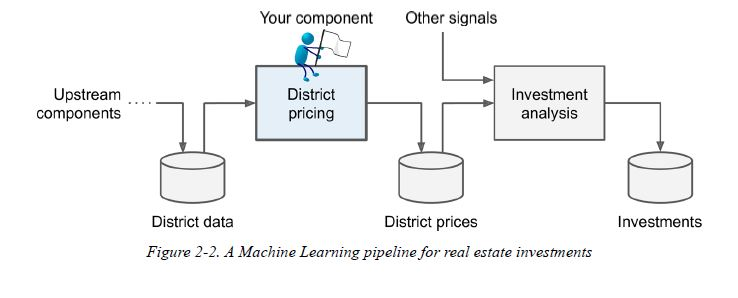

In [3]:
from IPython.display import Image
Image('figura_2_2.JPG',width=800, height=400) 

Primero, debe enmarcar el problema: 
* ¿está supervisado o no supervisado?

* ¿Es una tarea de **clasificación**, una tarea de **regresión** o algo más?

Veamos: 

* es claramente una tarea típica de aprendizaje supervisado, ya que se le brindan ejemplos de entrenamiento etiquetados   
* (cada instancia viene con el resultado esperado, es decir, el precio medio de la vivienda del distrito).

También es una tarea de regresión típica, ya que se le pide que prediga un valor.

Más específicamente, este es un problema de **regresión múltiple**, ya que el sistema usará múltiples características para hacer una predicción (usará la población del distrito, el ingreso medio, etc.).

También es un problema de **regresión univariante**, ya que solo estamos tratando de predecir un valor único para cada distrito.

Si estuviéramos tratando de predecir valores múltiples por distrito, sería un problema de **regresión multivariante**.

Finalmente, 
* no hay un flujo continuo de datos que ingresan al sistema, no hay una necesidad   
  particular de ajustarse a los datos cambiantes rápidamente, y   
* los datos son lo suficientemente pequeños como para caber en la memoria, por lo que el **aprendizaje por lotes simple** debería funcionar bien.

## TIP

Si los datos fueran enormes, podría dividir su trabajo de aprendizaje por lotes en varios servidores (utilizando la técnica MapReduce) o utilizar una técnica de aprendizaje en línea.

## Seleccione una medida de desempeño

El siguiente paso es seleccionar una medida de desempeño.

Una medida de rendimiento típica para los problemas de regresión es la raíz del error cuadrático medio.$(RMSE)$. 

Da una idea de cuánto error suele cometer el sistema en sus predicciones, con un mayor peso para los errores grandes.

La ecuación 2-1 muestra la fórmula matemática para calcular el RMSE

$$ RMSE(X,h) = \sqrt{\frac{1}{m} \sum_{i = 1}^{m} \left(h(x^{(i)} \right) - y^{(i)})^{2} } $$

aquí $x^{(i)}$ y $y^{(i)}$ son vectores columna. 

## Notaciones

Esta ecuación presenta varias notaciones de aprendizaje automático muy comunes que usaremos a lo largo de este libro:

* $m$ es el número de instancias en el conjunto de datos en el que está midiendo   
  el `RMSE`.
  * Por ejemplo, si está evaluando el RMSE en un conjunto de validación de 2,000  
    distritos, entonces $m = 2,000$.

* $x^{(i)}$ es un vector de todos los valores de características (excluyendo la etiqueta) de la $i$-ésima instancia en el conjunto de datos, y $y^{(i)}$ es su etiqueta (el valor de salida deseado para esa instancia).

  * Por ejemplo, si el primer distrito del conjunto de datos se encuentra en la longitud –118,29 °, la latitud 33,91 °, y tiene 1.416 habitantes con un ingreso medio de 7156.400 matemáticas (ignorando las otras características por ahora), entonces:
    
    $$ x^{(1)} = \begin{pmatrix} -118.29 \\ 33.91 \\ 1,416 \\ 38,372 \end{pmatrix} $$
    
    y
    
    $$ y^{(1)} = 156,400 $$

In [5]:
import numpy as np 
import pandas as pd 
housing = pd.read_csv('housing.csv') 
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing = housing.loc[:,['longitude', 'latitude', 'population', 'median_income','median_house_value']]
housing.head() 

,longitude,latitude,population,median_income,median_house_value
0,-122.23,37.88,322.0,8.3252,452600.0
1,-122.22,37.86,2401.0,8.3014,358500.0
2,-122.24,37.85,496.0,7.2574,352100.0
3,-122.25,37.85,558.0,5.6431,341300.0
4,-122.25,37.85,565.0,3.8462,342200.0


* $X$ es una matriz que contiene todos los valores de características o atributos (excluidas las etiquetas) de todas las instancias del conjunto de datos.

Hay una fila por instancia, y la $i$ésima fila es igual a la transpuesta de $x^{(i)}$, anotada $(x^{(i)})^{T}$.

Por ejemplo, si el primer distrito es como se acaba de describir, entonces la matriz $X$ se ve así:

$$ X =  \begin{pmatrix} (x^{(0)})^{T} \\ (x^{(2)})^{T} \\ \vdots \\ (x^{(m-1)})^{T}  \end{pmatrix} = \begin{pmatrix} -118.29 & 33.91 & 1,416 & 38,372 \\
\vdots & \vdots & \vdots & \vdots \end{pmatrix} $$

* $h$ es la función de predicción de su sistema, también llamada hipótesis.

Cuando su sistema recibe el vector de características $x_{i}$ de una instancia, genera un valor predicho $\hat{y} = h(x_{i})$ para esa instancia ($\hat{y}$ se pronuncia "y-hat").

Por ejemplo, si su sistema predice que el precio medio de la vivienda en el primer distrito es $\$158,400$, then $\hat{y}_{1} = h(x_{1}) = 158,400.$

El error de predicción para este distrito es $\hat{y} – y = 2,000$.

$RMSE(X,h)$ es la función de costo medida en el conjunto de ejemplos usando su hipótesis h.

* Usamos fuente en cursiva minúscula para valores escalares (como $y$) y nombres de funciones (como $h$),     
* fuente en negrita minúscula para vectores (como $\mathbf{x}$) y   
* fuente en negrita mayúscula para matrices (como $\mathbf{X}$).

Aunque el `RMSE` es generalmente la medida de rendimiento preferida para las tareas de regresión, en algunos contextos es posible que prefiera utilizar otra función.

For example, suppose that there are many outlier districts. 

In that case, you may consider using the mean absolute error (MAE, also called the average absolute
deviation; see Equation 2-2):

Equation 2-2. Mean absolute error (MAE)

$$ MAE(X, h) = \frac{1}{m} \sum_{i = 1}^{m} \left| h\left(x^{(i)} \right) − y^{(i)} \right| $$ 

Both the RMSE and the MAE are ways to measure the distance between two vectors:   
* the vector of predictions and 
* the vector of target values. 

Various distance measures, or norms, are possible:

* Computing the root of a sum of squares (RMSE) corresponds to the Euclidean norm: this is the notion of distance you 
  are familiar with. It is also called the $\mathcal{l}_{2}$ norm, noted $∥ \cdot ∥_{2}$ (or just $∥ \cdot ∥$).

* Computing the sum of absolutes (MAE) corresponds to the $\mathcal{l}_{1}$ norm, noted $∥ \cdot ∥$. This is sometimes 
  called the Manhattan norm because it measures the distance between two points in a city if you can only travel along
  orthogonal city blocks.

* More generally, the ℓ norm of a vector v containing n elements is defined as $∥v∥_{k} = \left(|v_{0}|^{k} + |v_{1}|^{k} + \cdots + |v_{n}|^{k} \right)^{1/k}$. $\mathcal{l}_{0}$ gives the number of nonzero elements in the vector, and $\mathcal{l}_{\infty}$ gives the maximum absolute value in the vector.

* The higher the norm index, the more it focuses on large values and neglects small ones. This is why the RMSE is more 
  sensitive to outliers than the MAE. But when outliers are exponentially rare (like in a bell-shaped curve), the RMSE 
  performs very well and is generally preferred.


## Verifique las suposiciones

Por último, es una buena práctica enumerar y verificar las suposiciones que se han hecho hasta ahora (por usted u otros); esto puede ayudarlo a detectar problemas serios desde el principio. 

Por ejemplo, los precios de distrito que genera su sistema se incorporarán a un sistema de aprendizaje automático descendente, y asume que estos precios se utilizarán como tales. 

Pero, ¿qué pasa si el sistema descendente convierte los precios en categorías (p. Ej., "Barato", "medio" o "caro") y luego usa esos categorías en lugar de los precios mismos? 

En este caso, conseguir el precio perfectamente correcto no es importante en absoluto; su sistema solo necesita elegir la categoría correcta. 

Si es así, entonces el problema debería haberse enmarcado como una tarea de clasificación, no una tarea de regresión. 

No querrás descubrir esto después de trabajar en un sistema de regresión durante meses.

Afortunadamente, después de hablar con el equipo a cargo del sistema posterior, está seguro de que realmente necesitan los precios reales, no solo las categorías.

¡Excelente! Ya está todo listo, las luces están en verde y puede comenzar a codificar ahora.



## Get the Data
Página 76  

Es hora de ensuciarse las manos. No dude en tomar su computadora portátil y recorrer los siguientes ejemplos de código en una computadora portátil de Jupyter. 

El cuaderno completo de Jupyter está disponible en https://github.com/ageron/handson-ml2.

## Referentes 

* Geron, A. Hand on Machile Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and   
  Techniques to Build Intelligent Systems